<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Principal Component Analysis

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Machine Learning in Python: A Hands-on Guide with Code* [e-book]. Zenodo. doi:10.5281/zenodo.15169138 [![DOI](https://zenodo.org/badge/863274676.svg)](https://doi.org/10.5281/zenodo.15169138) 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository* (0.0.3) [Software]. Zenodo. DOI: 10.5281/zenodo.13835312. GitHub repository: https://github.com/GeostatsGuy/MachineLearningDemos [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Principal Component Analysis**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Curse of Dimensionality, Dimensionality Reduction, Principal Component Analysis](https://youtu.be/-to3JXiae9Y?si=W1j2CwR9t0t8hxIB)
* [Multidimensional Scaling and Random Projection](https://youtu.be/Yt0o8ukIOKU?si=_ri1NPwKVdhYzgO3)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation for Principal Component Analysis

Working with more features / variables is harder!

1. More difficult to visualize data and model
2. More data are required to infer the joint probabilities
3. Less data coverage of feature space 
4. More difficult to interrogate / check the model
5. More likely redundant features, e.g., multicollinearity, resulting in model instability
6. More computational effort, more computational resources and longer run times
7. More complicated model is more likely overfit
8. More professional time for model construction

We get a better model with fewer, informative features than throwing all our features into the model! A big part of this motivation is driven by the curse of dimensionality.

#### Curse of Dimensionality

1. **Data and Model Visualization** - we cannot visualize beyond 3D, i.e., access the model fit to data, evaluate interpolation vs. extrapolation.

* consider a 5D example shown as a matrix scatter plot, even in this case there is an extreme marginalization to 2D for each plot,

<figure style="text-align: center;">
  <img src="_static\feature_ranking\matrix_scatterplot.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Example 5D data as a matrix scatter plot.</figcaption>
</figure>

2. **Sampling** - the number of samples sufficient to infer statistics like the joint probability, $P(x_1,\ldots,x_m)$.

* recall the calculation of a histogram or normalized histogram: we establish bins and calculate frequencies or probabilities in each bin.

* we require a nominal number of data samples for each bin, so we require $𝑛=𝑛_{𝑠/𝑏𝑖𝑛} \cdot 𝑛_{𝑏𝑖𝑛𝑠}$ samples in 1D

* but in mD we required $n$ samples to calculate the discretized joint probability,

$$
𝑛=𝑛_{𝑠/𝑏𝑖𝑛} \cdot 𝑛_{𝑏𝑖𝑛𝑠}^m$
$$

*  for example, 10 samples per bin with 35 bins requires 12,250 samples in 2D, and 428,750 samples in 3D

<figure style="text-align: center;">
  <img src="_static/feature_ranking/bivariate_example.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;">Example 2D data with 35 bins for each feature.</figcaption>
</figure>

3. **Sample Coverage** - the range of the sample values cover the predictor feature space.

* fraction of the possible solution space that is sampled, for 1 feature we assume 80\% coverage

* remember, we usually, directly sample only $\frac{1}{10^7}$ of the volume of the subsurface 

* yes, the concept of coverage is subjective, how much data to cover? What about gaps? etc.

<figure style="text-align: center;">
  <img src="_static/feature_ranking/coverage1D.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Example 2D data with 35 bins for each feature.</figcaption>
</figure>

* now if there is 80\% coverage for 2 features the 2D coverage is 64\%

<figure style="text-align: center;">
  <img src="_static/feature_ranking/coverage2D.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Example 2D data with 35 bins for each feature.</figcaption>
</figure>

* coverage is,

$$
c =  c_1^m
$$

4. **Distorted Space** - high dimensional space is distorted.

* take the ratio of the volume of an inscribed hypersphere in a hypercube,
  
$$
\frac{\pi^{\frac{m}{2}}}{m 2^{m-1} \Gamma\left(\frac{m}{2}\right)} \to 0 \quad \text{as} \quad m \to \infty
$$

* recall, $\Gamma(𝑛)=(𝑛−1)!$.

* high dimensional space is all corners and no middle and most of high dimensional space is far from the middle (all corners!).

* as a result distances in high dimensional space lose sensitivity, i.e., for any random points in the space the expected pairwise distances all become the same,  

$$
\lim_{m \to \infty} \left( \mathbb{E}\left[\text{dist}_{\text{max}}(m) - \text{dist}_{\text{min}}(m)\right] \right) \to 0
$$

* the limit of the expectation of the range of pairwise distances over random points in hyper-dimensional space tends to zero. If distances are almost all the same, Euclidian distance is no longer meaningful!

<figure style="text-align: center;">
  <img src="_static/feature_ranking/distortion_chart.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;">The ratio of the volume of a hypersphere within a hypercube.</figcaption>
</figure>

* here's the severity of the distortion for various dimensionalities,

| m  | nD / 2D   |
|----|-----------|
| 2  | 1.0       |
| 5  | 0.28      |
| 10 | 0.003     |
| 20 | 0.00000003|

5. **Multicollinearity** - higher dimensional datasets are more likely to have collinearity or multicollinearity.

* Feature linearly described by other features resulting in high model variance.

#### Inferential Machine Learning

Princpal conponent analysis is an inferential, unsupervised machine learnng method. 

* there are no response features, $y$, just predictor features,

$$
𝑋_1,\ldots,𝑋_𝑚
$$

* Machine learns by mimicry a compact representation of the data
* Captures patterns as feature projections, group assignments, neural network latent features, etc.
* We focus on inference of the population, the natural system, instead of prediction of response features.

#### Principal Component Analysis

Principal Component Analysis one of a variety of methods for dimensional reduction:

Dimensional reduction transforms the data to a lower dimension

* Given features, $𝑋_1,\dots,𝑋_𝑚$ we would require ${m \choose 2}=\frac{𝑚 \cdot (𝑚−1)}{2}$ scatter plots to visualize just the two-dimensional scatter plots.

* Once we have 4 or more variables understanding our data gets very hard.

* Recall the curse of dimensionality, impact inference, modeling and visualization. 

One solution, is to find a good lower dimensional, $𝑝$,  representation of the original dimensions $𝑚$

Benefits of Working in a Reduced Dimensional Representation:

1. Data storage / Computational Time

2. Easier visualization

3. Also takes care of multicollinearity 

#### Orthogonal Transformation 

Convert a set of observations into a set of linearly uncorrelated variables known as principal components

* The number of principal components ($k$) available are min⁡($𝑛−1,𝑚$) 

* Limited by the variables/features, $𝑚$, and the number of data

Components are ordered,

* First component describes the larges possible variance / accounts for as much variability as possible
  
* Next component describes the largest possible remaining variance
   
* Up to the maximum number of principal components

There are mutliple ways to interpret principal components analysis,

#### Best Fitting Interpretation

Minimizes the orthogonal projection error between the data and the principal components,

$$ 
\min \sum_{i=1}^{n} \left( \left( X_i - \bar{X} \right) - \left( X_i - \bar{X} \right) V_p V_p^T \right)^2 
$$

where $𝑽_𝒑$ is a matrix of our first $𝒑$ vectors, and $𝑿_𝒊$ is a vector for sample $𝑖$ over all $𝑝$ features and $\overline{X}$ is a vector of the means,

<figure style="text-align: center;">
  <img src="_static/PCA/error.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Orthogonal error when projecting 2D data to 1D (left) and 3D data to 2D (right)(citation to be added).
</figcaption>
</figure>

where the princpal components describe a vector in 1D and a plane in 2D, and where the principal component scores in the projected space are,

$$
(𝑿_𝒊−\overline{𝑿})𝑽_𝒑
$$

and the back transformation in the original space with reduced dimensionality is,

$$
(𝑿_𝒊−\overline{X})𝑽_𝒑 𝑽_𝒑^𝑻
$$

note, given the $V_p$ matrix is orthogonal,

$$
V_p^T = V_p^{-1}
$$

#### Rotation-based Intepretation

Orthogonal transformation is a rotation that maximizes the variance explained on the first principal component, maximizes the remaining variance on the second principal component, etc.

If you would like to see PCA as a rotation in action, check out my [PCA Rotation interactive Python dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_PCA_Rotation.ipynb), 

<figure style="text-align: center;">
  <img src="_static/PCA/rotation.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> My interactive dashboard demonstrating PCA as rotation of the data.
</figcaption>
</figure>

from this dashboard it is clear that there is a rotation that maixmizes the variance explained by the first principal component while removing the correlation between the first and second principal component.

#### Eigenvalues / Eigenvectors Interpretation

For principal components analysis we calculate the data covariance matrix, the pairwise covariance for the combinatorial of features. 

* The we calculate the eigenvectors and eigenvalues from the covariance matrix.

* The eigenvalues are the variance explained for each component.
   
* The eigenvectors of the data covariance matrix are the principal components.

#### The Principal Components Analysis Workflow

1. Standardize the Features

$$
𝑋^𝑠=\frac{𝑋−\overline{X}}{\sigma_𝑋} 
$$

$$
𝑋_1,\ldots,𝑋_𝑚 \quad \rightarrow 𝑋_1^𝑠,\ldots,𝑋_𝑚^𝑠
$$

    where $X_i$ are original features and $X^s_i$ are transformed features.

* standardization is required to prevent features with larger variance dominating the solution, i.e., first principal component aligned with feature with greatest variance

2.   Calculate the standardized feature covariance matrix

$$ 
C_{(X_{m_1}, X_{m_2})} = \frac{\sum_{i=1}^{n} \left( (x_{m_1} - \bar{x}_{m_1})(x_{m_2} - \bar{x}_{m_2}) \right)}{n - 1} 
$$

    given the features are standardized the matrix is a correlation matrix

$$ 
C = \begin{bmatrix}
C(X_1, X_1) & \cdots & C(X_1, X_m) \\
\vdots & \ddots & \vdots \\
C(X_m, X_1) & \cdots & C(X_m, X_m)
\end{bmatrix} 
$$

    given the features are standardized the matrix is a correlation matrix,

$$ 
C = \begin{bmatrix}
\rho(X_1, X_1) & \cdots & \rho(X_1, X_m) \\
\vdots & \ddots & \vdots \\
\rho(X_m, X_1) & \cdots & \rho(X_m, X_m)
\end{bmatrix} 
$$

3. Calculate the eigenvalues and eigenvectors of covariance matrix, $𝑪$,

    given 𝐶 is a square matrix $(𝑚 \times 𝑚)$, $𝑣 (𝑚 \times 1)$ is a vector and $\lambda$ is a scaler ($1$),

$$
𝐶𝑣=\lambda 𝑣
$$

    we can reorder to,

$$
(𝐶− \lambda \cdot 𝐼)∙𝑣=0
$$

    where $I$ is an identity matrix. By Cramer’s rule, we have a solution if the determinant is 0,

$$
|𝐶− \lambda \cdot 𝐼|=0
$$

    find the possible Eigenvalues, $\lambda_𝛼$, and solve for eigenvectors, $𝒗_𝜶, \quad \alpha=𝟏,\ldots,𝒎$

* the resulting $\text{𝒎𝒊𝒏}⁡(𝒎,𝒏−𝟏)$ eigenvectors in a matrix, $𝑽_𝒎$

<figure style="text-align: center;">
  <img src="_static/PCA/components.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Eigen vectors as principal components.
</figcaption>
</figure>

    that form a basis on which the data are projected for dimensionality reduction,

<figure style="text-align: center;">
  <img src="_static/PCA/components_basis.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Eigen vectors as principal components defining the new rotated basis.
</figcaption>
</figure>

If you would like to see the principal components loadings and the variance partitioning between components, check out my [PCA loadings interactive Python dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_PCA_Eigen.ipynb), 

<figure style="text-align: center;">
  <img src="_static/PCA/interactive_loadings.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> My interactive dashboard demonstrating PCA loadings and variance explained for eacch principal component as correlation is changes between features 1, 2 and 3.
</figcaption>
</figure>

#### Load the Required Libraries

The following code loads the required libraries. These should have been installed with Anaconda 3.

In [193]:
ignore_warnings = True                                        # ignore warnings?
from sklearn.preprocessing import MinMaxScaler                # min/max normalization
from sklearn.decomposition import PCA                         # PCA program from scikit learn (package for machine learning)
from sklearn.preprocessing import StandardScaler              # standardize variables to mean of 0.0 and variance of 1.0
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import pandas.plotting as pd_plot                             # pandas plotting functions
import copy                                                   # for deep copies
import os                                                     # set working directory, run executables
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
import matplotlib.ticker as mtick                             # control tick label formatting
from matplotlib.ticker import PercentFormatter                # percentage axis label formatting
import seaborn as sns                                         # advanced plotting
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map
seed = 42                                                     # random number seed

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Let's define a single function to streamline plotting correlation matrices. I also added a convenience function to add major and minor gridlines to improve plot interpretability.

In [5]:
def plot_corr(df,size=10):                                    # plots a graphical correlation matrix 
    from matplotlib.colors import ListedColormap              # make a custom colormap
    my_colormap = plt.cm.get_cmap('RdBu_r', 256)          
    newcolors = my_colormap(np.linspace(0, 1, 256))
    white = np.array([256/256, 256/256, 256/256, 1])
    newcolors[65:191, :] = white                              # mask all correlations less than abs(0.8)
    newcmp = ListedColormap(newcolors)
    m = len(df.columns)
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0,cmap = newcmp)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')
    for i in range(0,m):
        plt.plot([i-0.5,i-0.5],[-0.5,m-0.5],color='black')
        plt.plot([-0.5,m-0.5],[i-0.5,i-0.5],color='black')
    plt.ylim([-0.5,m-0.5]); plt.xlim([-0.5,m-0.5])

def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks 

def add_grid2(sub_plot):
    sub_plot.grid(True, which='major',linewidth = 1.0); sub_plot.grid(True, which='minor',linewidth = 0.2) # add y grids
    sub_plot.tick_params(which='major',length=7); sub_plot.tick_params(which='minor', length=4)
    sub_plot.xaxis.set_minor_locator(AutoMinorLocator()); sub_plot.yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).


In [212]:
#os.chdir("c:/Local")                                 # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

Let's load the provided multivariate, spatial dataset 'unconv_MV.csv'. This dataset has variables from 1,000 unconventional wells including:

* well average porosity
* log transform of permeability (to linearize the relationships with other variables)
* acoustic impedance (kg/m^3 x m/s x 10^6)
* brittleness ratio (%)
* total organic carbon (%)
* vitrinite reflectance (%)
* initial production 90 day average (MCFPD).  

Note, the dataset is synthetic.

We load it with the pandas 'read_csv' function into a DataFrame we called 'my_data' and then preview it to make sure it loaded correctly.

In [9]:
#my_data = pd.read_csv("unconv_MV.csv")  
my_data = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv") # load the comma delimited data file
my_data = my_data.iloc[:,1:]                              # remove the well index

#### Visualize the DataFrame

Visualizing the DataFrame is a useful first check.

We can preview by slicing the DataFrame. 

* we are showing all records from 0 up to and not including 7

In [11]:
my_data[:7]                                               # preview the first 7 rows of the dataframe

,Por,LogPerm,AI,Brittle,TOC,VR,Production
0,15.91,1.67,3.06,14.05,1.36,1.85,177.381958
1,15.34,1.65,2.60,31.88,1.37,1.79,1479.767778
2,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583
3,11.95,1.14,3.90,58.81,0.40,2.03,1488.317629
4,19.53,1.83,2.57,43.75,1.40,2.11,5261.094919
5,19.47,2.04,2.73,54.37,1.42,2.12,5497.005506
6,12.70,1.30,3.70,43.03,0.45,1.95,1784.266285


#### Summary Statistics for Tabular Data

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. 

* We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [13]:
my_data.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.85750,14.98500,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.13000,1.39000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.57750,3.01000,3.360000,4.70000
Brittle,1000.0,49.719480,15.077006,-10.500000,39.72250,49.68000,59.170000,93.47000
TOC,1000.0,1.003810,0.504978,-0.260000,0.64000,0.99500,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.81000,2.00000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.36956,1976.48782,3023.594214,12568.64413


Good that we checked the summary statistics, we have some negative values for brittleness and total organic carbon. This is physically impossible.  

* The values must be in error. We know the lowest possible values are 0.0, so we will truncate on 0.0.  

We use the:

```python
df.get_numerical_data()
```

DataFrame member function to get a shallow copy of the data from the DataFrame.  

Since it is a shallow copy, any changes we make to the copy are made to the data in the original DataFrame.  

* This allows us to apply this simple conditional statement to all the data values in the DataFrame all at once.

In [15]:
num = my_data._get_numeric_data()                         # get the numerical values
num[num < 0] = 0                                          # truncate negative values to 0.0
my_data.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.85750,14.98500,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.13000,1.39000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.57750,3.01000,3.360000,4.70000
Brittle,1000.0,49.731480,15.033593,0.000000,39.72250,49.68000,59.170000,93.47000
TOC,1000.0,1.006170,0.499838,0.000000,0.64000,0.99500,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.81000,2.00000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.36956,1976.48782,3023.594214,12568.64413


#### Calculate the Correlation Matrix 

For dimensional reduction, a good first step is data visualization.  

Let's start with the correlation matrix.  

We can calculate it and view it in the console with these commands.

```python
corr_matrix = np.corrcoef(my_data, rowvar = False)
```

the input data is a 2D ndarray and $rowvar$ specifies if the variables are in the rows instead of columns. 

In [17]:
corr_matrix = np.corrcoef(my_data, rowvar = False)
print(np.around(corr_matrix,2))                           # print the correlation matrix to 2 decimals

[[ 1.    0.81 -0.51 -0.25  0.71  0.08  0.69]
 [ 0.81  1.   -0.32 -0.15  0.51  0.05  0.57]
 [-0.51 -0.32  1.    0.17 -0.55  0.49 -0.33]
 [-0.25 -0.15  0.17  1.   -0.24  0.3  -0.07]
 [ 0.71  0.51 -0.55 -0.24  1.    0.31  0.5 ]
 [ 0.08  0.05  0.49  0.3   0.31  1.    0.14]
 [ 0.69  0.57 -0.33 -0.07  0.5   0.14  1.  ]]


Note the 1.0 diagonal resulting from the correlation of each variable with themselves.  

Let's use our function declared above to make a graphical correlation matrix visualization.  

* This may improve our ability to spot features. It relies on the built in correlation matrix method with Numpy DataFrames and MatPlotLib for plotting.

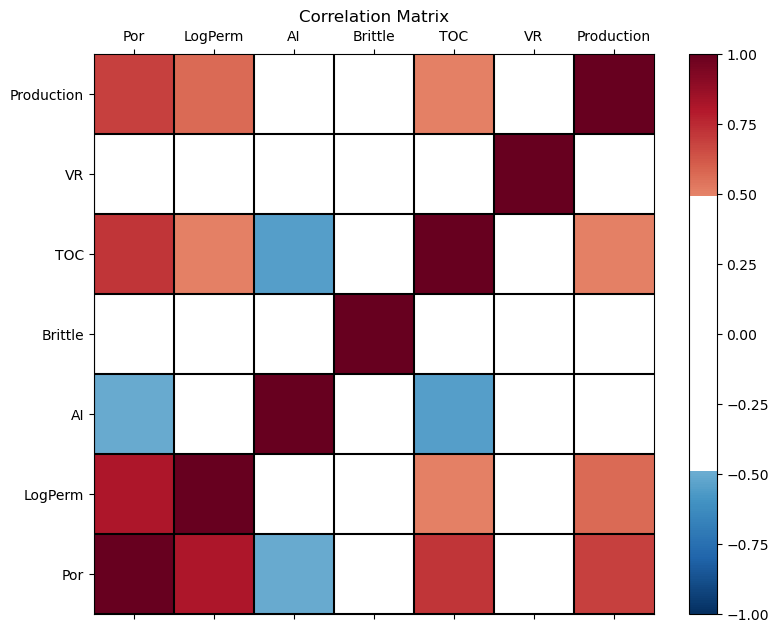

In [19]:
plot_corr(my_data,7)                                      # using our correlation matrix visualization function
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.8, wspace=0.2, hspace=0.3); plt.show()

This looks good. There is a mix of bivariate, linear correlation magnitudes. Of course, correlation coefficients are limited to degree of linear correlations.  

#### Check Matrix Scatter Plots

For more complete information, let's look at the matrix scatter plot from the Pandas package. 

* covariance and correlation are sensitive to outliers and nonlinearity

```python
pd_plot.scatter_matrix(my_data)
```

the $alpha$ allows us to use semitransparent points for easier visualization with dense scatter plots.

the $hist_kwds$ is a set of parameters for the histograms on the diagonal elements.


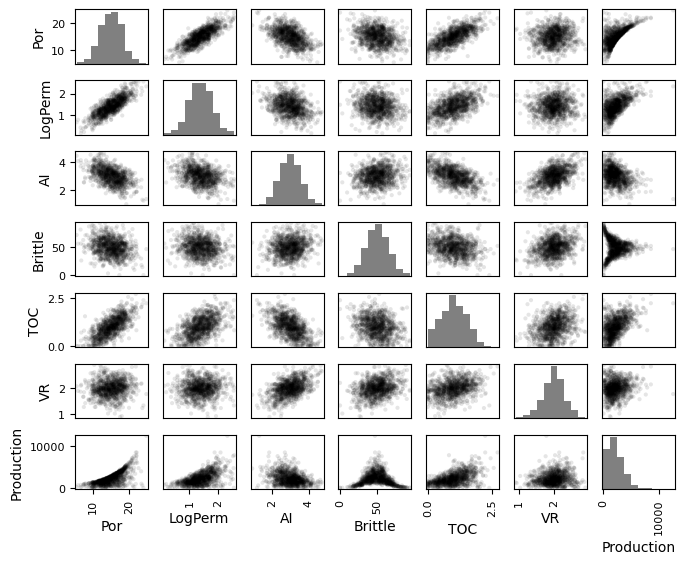

In [21]:
pd_plot.scatter_matrix(my_data, alpha = 0.1,              # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.8, wspace=0.2, hspace=0.3); plt.show()

#### Simple Bivariate Example

Let's simplify the problem to bivariate (2 features), porosity and the log transform of permeability and reduce the number of wells from 1,000 to 100.

In [23]:
my_data_por_perm = my_data.iloc[0:100,0:2]                # extract just por and logperm, 100 samples
my_data_por_perm.describe().transpose()                   # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,100.0,14.9856,2.823016,9.23,12.9275,14.720,16.705,21.00
LogPerm,100.0,1.3947,0.390947,0.36,1.1475,1.365,1.650,2.48


Let's first check the univariate statistics of Por and LogPerm.

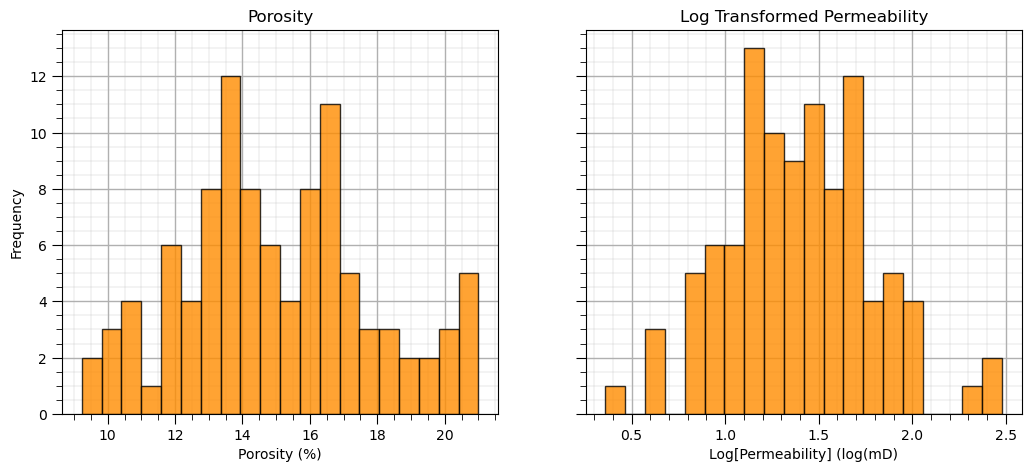

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(my_data_por_perm["Por"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
ax1.set_title('Porosity'); ax1.set_xlabel('Porosity (%)'); ax1.set_ylabel('Frequency'); add_grid2(ax1)
ax2.hist(my_data_por_perm["LogPerm"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
ax2.set_title('Log Transformed Permeability'); ax2.set_xlabel('Log[Permeability] (log(mD)'); add_grid2(ax2)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.8, wspace=0.2, hspace=0.3); plt.show()

The distributions may actually be Gaussian distributed, regardless they are well behaved, we cannot observe obvious gaps nor truncations.  

Let's look at a scatter plot of porosity vs. log permeability.

This would be the basic command from *matplotlib* to make a scatter plot. 

```python
plt.scatter(my_data_por_perm["Por"],my_data_por_perm["LogPerm"]
```
* the additional parameters are for formatting and labels


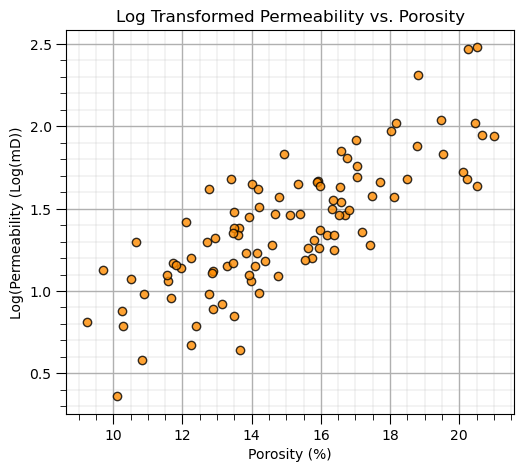

In [27]:
plt.scatter(my_data_por_perm["Por"],my_data_por_perm["LogPerm"],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")
plt.title('Log Transformed Permeability vs. Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Log(Permeability (Log(mD))'); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.7, top=0.8, wspace=0.2, hspace=0.3); plt.show()

#### Calculation of Principal Components

With the log transform of permeability we have a very nice linear relationship with porosity, PCA should work well on this data.  

* We are ready to perform PCA with porosity and log of permeability. 

#### Standardize the Features

We must standardize our variables to have a mean equal to zero, $\bar{x} = 0.0$, and the variance equal to one, $\sigma^{2}_{x} = 1.0$.  

* Otherwise the difference between the scale of porosity and permeability would have a significant impact. Note, given the impact of choice of units on variance, e.g., darcies (D) vs. millidarcies (mD) for permeability or fraction instead of a percentage for porosity. This is quite arbitrary! 

To remove this effect, we should always standardize unless the two variables have the same units and then the range, variance between them is meaningful and standardization could remove important information.

In [29]:
features = ['Por','LogPerm']
x = my_data_por_perm.loc[:,features].values
mu = np.mean(x, axis=0)
sd = np.std(x, axis=0)
x = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0

print("Original Mean Por", np.round(mu[0],2), ', Original Mean LogPerm = ', np.round(mu[1],2)) 
print("Original StDev Por", np.round(sd[0],2), ', Original StDev LogPerm = ', np.round(sd[1],2)) 
print('Mean Transformed Por =',np.round(np.mean(x[:,0]),2),', Mean Transformed LogPerm =',np.round(np.mean(x[:,1]),2))
print('Variance Transformed Por =',np.var(x[:,0]),', Variance Transformed LogPerm =',np.var(x[:,1]))

Original Mean Por 14.99 , Original Mean LogPerm =  1.39
Original StDev Por 2.81 , Original StDev LogPerm =  0.39
Mean Transformed Por = 0.0 , Mean Transformed LogPerm = -0.0
Variance Transformed Por = 1.0000000000000002 , Variance Transformed LogPerm = 1.0


In [30]:
cov = np.cov(x,rowvar = False)
cov

array([[1.01010101, 0.80087707],
       [0.80087707, 1.01010101]])

"x" is a 2D ndarray from Numpy package with the features in columns and the samples in rows.  

* Above we confirm that the features in the "x" 2D array are standardized. 

It is not a bad idea to check the univariate and bivariate distributions of our standardized variables.

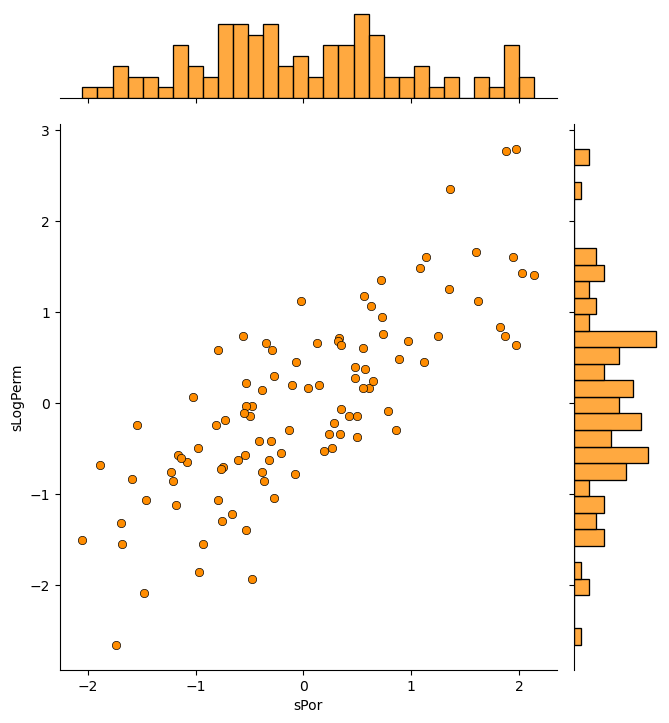

In [32]:
dfS = pd.DataFrame({'sPor': x[:,0], 'sLogPerm': x[:,1]})
sns.jointplot(data=dfS,x='sPor',y='sLogPerm',marginal_kws=dict(bins=30),color='darkorange',edgecolor='black')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.3); plt.show()

Everything looks fine and we are ready to apply principal components analysis.

#### Principal Component Analysis (PCA)

To run PCA with the SciKitLearn machine learning package in Python, we first make a PCA model with a specified number of components and then we 'fit' it to our data. 

```python
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(x)
```
As you will see later with dimensional reduction, we can use matrix math with this model and reduce our data to any dimensionality from 1 to the number of features, m. Let's run the model with number of components equal to number of features, m.

In [34]:
n_components = 2
pca = PCA(n_components=n_components).fit(x)

#### Component Loadings

The first thing we should do is look at the component loadings. Let's view them and interpret our result.

In [36]:
print(np.round(pca.components_,3))
print('First Principal Component = ' + str(np.round(pca.components_[0,:],3)))
print('Second Principal Component = ' + str(np.round(pca.components_[1,:],3)))

[[ 0.707  0.707]
 [ 0.707 -0.707]]
First Principal Component = [0.707 0.707]
Second Principal Component = [ 0.707 -0.707]


The components are listed as a 2D array (ndarray) with:

* principal components on the rows
* features on the columns
* the rows are sorted so that the first principal component is the top row and the last principal component is the last row.

#### Proportion of Variance Explained with Principal Components 

It is also important to look at the proportion of the variance described by each principal component.

In [38]:
print('Variance explained by PC1 and PC2 =', np.round(pca.explained_variance_ratio_,3))
print('First Principal Component explains ' + str(np.round(pca.explained_variance_ratio_[0],3)) + ' of the total variance.')
print('Second Principal Component explains ' + str(np.round(pca.explained_variance_ratio_[1],3)) + ' of the total variance.')

Variance explained by PC1 and PC2 = [0.896 0.104]
First Principal Component explains 0.896 of the total variance.
Second Principal Component explains 0.104 of the total variance.


#### Principal Component Scores, Forward and Reverse Projections

We can calculate the principle component scores of the original data. 

* This is effectively a rotation of the data, aligned with PC1 for the direction of greatest variance.  

* We will calculate the principal component scores with the "transform" function built into PCA and then visualize as a scatter plot. 

* Then to "close the loop" and check what we have done (and our knowledge) we will reverse the PCA, go from the principal component scores back to the standardized features.

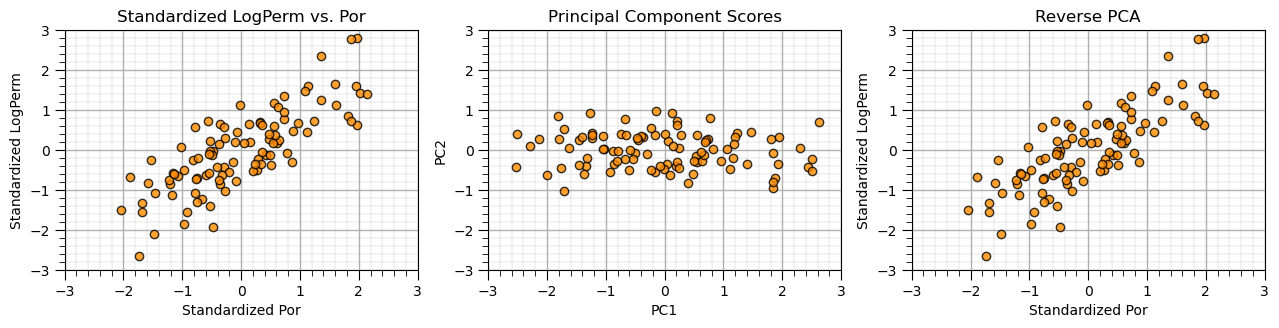

In [40]:
f, (ax101, ax102, ax103) = plt.subplots(1, 3,figsize=(12,3))
f.subplots_adjust(wspace=0.7)

ax101.scatter(x[:,0],x[:,1], s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")
ax101.set_title('Standardized LogPerm vs. Por'); ax101.set_xlabel('Standardized Por'); ax101.set_ylabel('Standardized LogPerm')
ax101.set_xlim([-3,3]); ax101.set_ylim([-3,3]); add_grid2(ax101)

x_trans = pca.transform(x)                                # calculate the principal component scores
ax102.scatter(x_trans[:,0],-1*x_trans[:,1],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")
ax102.set_title('Principal Component Scores'); ax102.set_xlabel('PC1'); ax102.set_ylabel('PC2')
ax102.set_xlim([-3,3]); ax102.set_ylim([-3,3]); add_grid2(ax102)

x_reverse = pca.inverse_transform(x_trans)                        # reverse the principal component scores to standardized values
ax103.scatter(x_reverse[:,0],x_reverse[:,1],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")
ax103.set_title('Reverse PCA'); ax103.set_xlabel('Standardized Por'); ax103.set_ylabel('Standardized LogPerm')
ax103.set_xlim([-3,3]); ax103.set_ylim([-3,3]); add_grid2(ax103)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.8, wspace=0.2, hspace=0.3); plt.show()

The standardized original and reverse PCA cross plots should look exactly the same. If so, the method is working.

#### Conservation of Variance

Let's check the variances of the principle component scores, since we have calculated them now.

* we calculate the variance for each of the original features

* then sum to get the original total variance

* we calculate the variance for each of the transformed, principal component scores

* then we sum to get the transformed total variance

We note the:

* the first principal component score has larger variance than the second component scores

* total variance is preserved over the transformation, the sum of variance is the same for original features and m principal component scores

In [42]:
print('Variance of the 2 features:')
print(np.var(x, axis = 0))

print('\nTotal Variance from Original Features:')
print(np.sum(np.var(x, axis = 0)))

print('\nVariance of the 2 principle components:')
print(np.round(np.var(x_trans, axis = 0),2))

print('\nTotal Variance from Original Features:')
print(round(np.sum(np.var(x_trans, axis = 0)),2))

Variance of the 2 features:
[1. 1.]

Total Variance from Original Features:
2.0

Variance of the 2 principle components:
[1.79 0.21]

Total Variance from Original Features:
2.0


#### Independence of Principal Component Scores

Let's check the correlations for the original features vs. our projected features.

In [44]:
print('\nCorrelation Matrix of the 2 original features components:')
print(np.round(np.corrcoef(x, rowvar = False),2))

print('\nCorrelation Matrix of the 2 principle components\' scores:')
print(np.round(np.corrcoef(x_trans, rowvar = False),2))


Correlation Matrix of the 2 original features components:
[[1.   0.79]
 [0.79 1.  ]]

Correlation Matrix of the 2 principle components' scores:
[[ 1. -0.]
 [-0.  1.]]


We have projected our original features with high correlation to 2 new features without correlation between the new features.

#### Principal Component Analysis By-hand with Eigenvalue and Eigen Vector Calculator

Let's show PCA by-hand with the standardized features and the eigen calculation and compare to the scikit-learn results from above.

* we confirm that the results match.

Eigen Vectors:
[[ 0.71 -0.71]
 [ 0.71  0.71]]
First Eigen Vector: [0.70710678 0.70710678]
Second Eigen Vector: [-0.70710678  0.70710678]
Eigen Values:
[1.81 0.21]


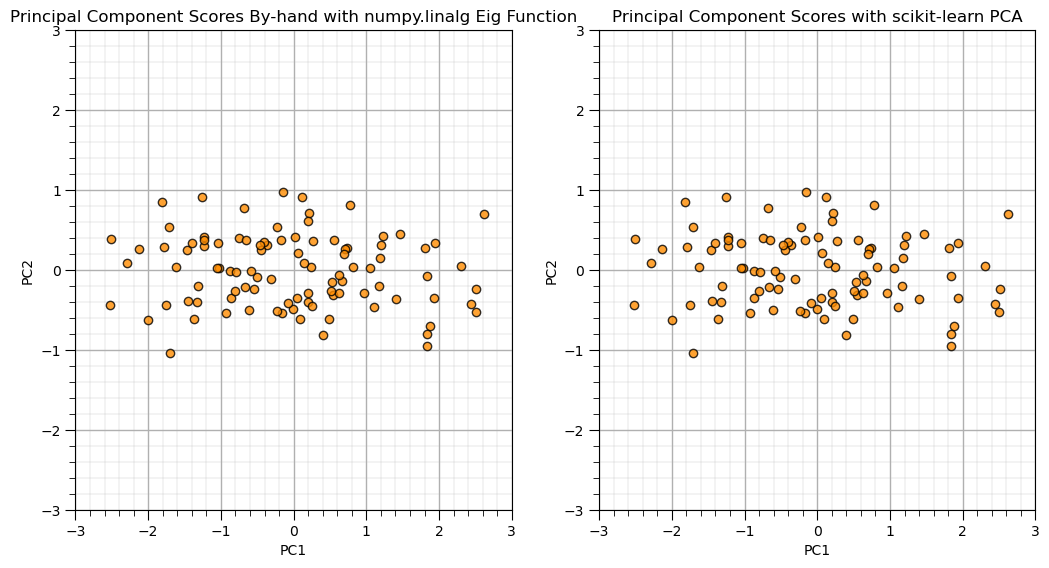

In [46]:
from numpy.linalg import eig
eigen_values,eigen_vectors = eig(cov)
print('Eigen Vectors:\n' +  str(np.round(eigen_vectors,2)))
print('First Eigen Vector: ' + str(eigen_vectors[:,0]))
print('Second Eigen Vector: ' + str(eigen_vectors[:,1]))
print('Eigen Values:\n' +  str(np.round(eigen_values,2)))
PC = eigen_vectors.T.dot(x.T)
plt.subplot(121)
plt.scatter(PC[0,:],PC[1,:],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")
plt.title('Principal Component Scores By-hand with numpy.linalg Eig Function'); plt.xlabel('PC1'); plt.ylabel('PC2')
plt.xlim([-3,3]); plt.ylim([-3,3]); add_grid()

plt.subplot(122)
plt.scatter(x_trans[:,0],-1*x_trans[:,1],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")
plt.title('Principal Component Scores with scikit-learn PCA'); plt.xlabel('PC1'); plt.ylabel('PC2')
plt.xlim([-3,3]); plt.ylim([-3,3]); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.0, wspace=0.2, hspace=0.3); plt.show()

#### Demonstration of Dimensional Reduction

Now let's attempt **dimensional reduction** by only retaining the first principle component. We will go from original values to predictions of original values. 

* Recall we were able to explain about 90% of the variance with the first principal component so the result should look 'pretty good', right?

We will do the whole thing by hand to make it as simple/understandable as possible for this first time through.  Later we will be much more compact.  The steps: 

1. start with the original porosity and permeability data 
2. standardize such that Por and LogPerm have a mean of 0.0 and a variance of 1.0
3. calculate the 2 principal component model, visualize the principal component scores
4. remove the 2nd principal component by setting the associated component scores to 0.0
5. reverse the principal component by matrix multiplication of the scores with the component loadings
6. apply matrix math to restore the original mean and variance

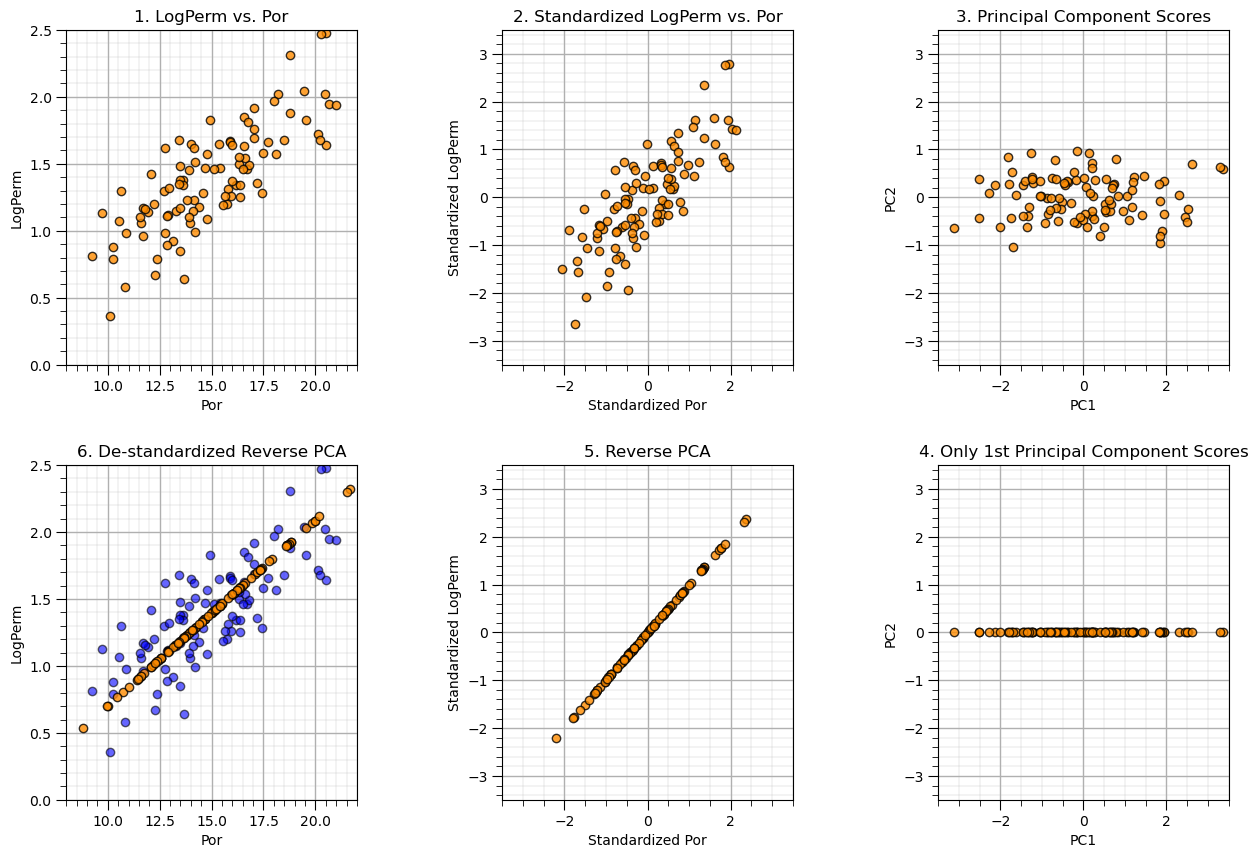

In [48]:
nComp = 1
f, ((ax201, ax202, ax203), (ax206, ax205, ax204)) = plt.subplots(2, 3,figsize=(15,10))
#f, ((ax201, ax202), (ax203, ax204), (ax205, ax206)) = plt.subplots(3, 2,figsize=(10,15))
f.subplots_adjust(wspace=0.5,hspace = 0.3)

ax201.scatter(my_data_por_perm["Por"],my_data_por_perm["LogPerm"],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")
ax201.set_title('1. LogPerm vs. Por'); ax201.set_xlabel('Por'); ax201.set_ylabel('LogPerm')
ax201.set_xlim([8,22]); ax201.set_ylim([0,2.5]); add_grid2(ax201)

mu = np.mean(np.vstack((my_data_por_perm["Por"].values,my_data_por_perm["LogPerm"].values)), axis=1)
sd = np.std(np.vstack((my_data_por_perm["Por"].values,my_data_por_perm["LogPerm"].values)), axis=1)
x = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0

ax202.scatter(x[:,0],x[:,1], s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")
ax202.set_title('2. Standardized LogPerm vs. Por'); ax202.set_xlabel('Standardized Por'); ax202.set_ylabel('Standardized LogPerm')
ax202.set_xlim([-3.5,3.5]); ax202.set_ylim([-3.5,3.5]); add_grid2(ax202)

n_components = 2                                          # build principal component model with 2 components
pca = PCA(n_components=n_components)
pca.fit(x)

x_trans = pca.transform(x)                                # calculate principal component scores
ax203.scatter(x_trans[:,0],-1*x_trans[:,1],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")
ax203.set_title('3. Principal Component Scores'); ax203.set_xlabel('PC1'); ax203.set_ylabel('PC2')
ax203.set_xlim([-3.5,3.5]); ax203.set_ylim([-3.5,3.5]); add_grid2(ax203)

x_trans[:,1] = 0.0                                         # zero / remove the 2nd principal component 

ax204.scatter(x_trans[:,0],x_trans[:,1],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")
ax204.set_title('4. Only 1st Principal Component Scores'); ax204.set_xlabel('PC1'); ax204.set_ylabel('PC2')
ax204.set_xlim([-3.5,3.5]); ax204.set_ylim([-3.5,3.5]); add_grid2(ax204)

xhat = pca.inverse_transform(x_trans)                             # reverse the principal component scores to standardized values
ax205.scatter(xhat[:,0],xhat[:,1],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")
ax205.set_title('5. Reverse PCA'); ax205.set_xlabel('Standardized Por'); ax205.set_ylabel('Standardized LogPerm')
ax205.set_xlim([-3.5,3.5]); ax205.set_ylim([-3.5,3.5]); add_grid2(ax205)

xhat = np.dot(pca.inverse_transform(x)[:,:nComp], pca.components_[:nComp,:])
xhat = sd*xhat + mu                                       # remove the standardization

ax206.scatter(my_data_por_perm["Por"],my_data_por_perm["LogPerm"],s=None, c="blue", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=1.0, edgecolors="black")
ax206.scatter(xhat[:,0],xhat[:,1],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")
ax206.set_title('6. De-standardized Reverse PCA'); ax206.set_xlabel('Por'); ax206.set_ylabel('LogPerm')
ax206.set_xlim([8,22]); ax206.set_ylim([0,2.5]); add_grid2(ax206)

plt.show()

Let's put the original data and the resulting lower dimensional model side-by-side and check the resulting variances.

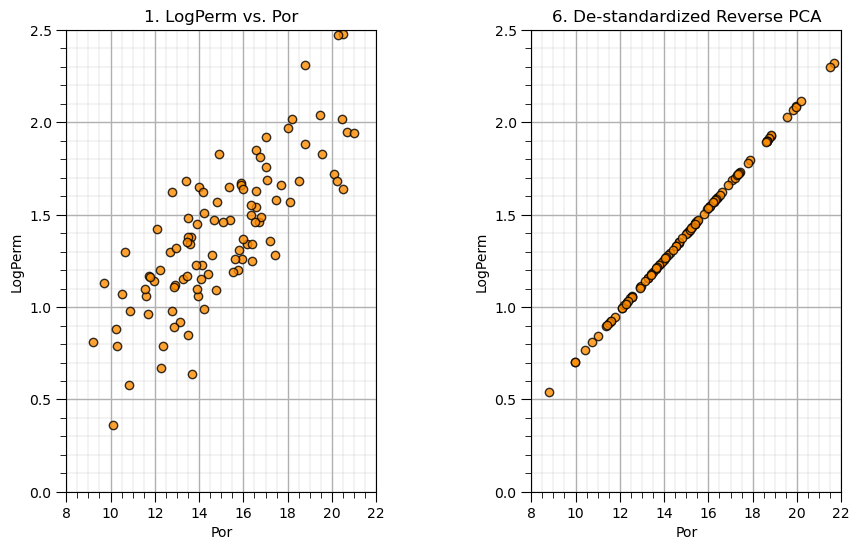

Variance Por = 7.89 , Variance Reduced Dimensional Por = 7.073 Fraction =  0.896
Variance LogPerm = 0.151 , Variance Reduced Dimensional LogPerm = 0.136 Fraction =  0.896
Total Variance = 8.041 , Total Variance Reduced Dimension = 7.208 Fraction =  0.896


In [50]:
f, (ax201, ax206) = plt.subplots(1, 2,figsize=(10,6))
f.subplots_adjust(wspace=0.5,hspace = 0.3)

ax201.scatter(my_data_por_perm["Por"],my_data_por_perm["LogPerm"],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")
ax201.set_title('1. LogPerm vs. Por'); ax201.set_xlabel('Por'); ax201.set_ylabel('LogPerm')
ax201.set_xlim([8,22]); ax201.set_ylim([0,2.5]); add_grid2(ax201)

ax206.scatter(xhat[:,0],xhat[:,1],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")
ax206.set_title('6. De-standardized Reverse PCA'); ax206.set_xlabel('Por'); ax206.set_ylabel('LogPerm')
ax206.set_xlim([8,22]); ax206.set_ylim([0,2.5]); add_grid2(ax206)
plt.show()

var_por = np.var(my_data_por_perm["Por"]); var_por_hat = np.var(xhat[:,0]);
var_logperm = np.var(my_data_por_perm["LogPerm"]); var_logperm_hat = np.var(xhat[:,1]);
print('Variance Por =',np.round(var_por,3),', Variance Reduced Dimensional Por =',np.round(var_por_hat,3),'Fraction = ',np.round(var_por_hat/var_por,3))
print('Variance LogPerm =',np.round(var_logperm,3),', Variance Reduced Dimensional LogPerm =',np.round(var_logperm_hat,3),'Fraction = ',np.round(var_logperm_hat/var_logperm,3))
print('Total Variance =',np.round(var_por + var_logperm,3), ', Total Variance Reduced Dimension =',np.round(var_por_hat+var_logperm_hat,3),'Fraction = ',np.round((var_por_hat+var_logperm_hat)/(var_por+var_logperm),3))

#### All Predictor Features

We will go back to the original data file and this time extract all 6 predictor variables and the first 500 samples.  

In [52]:
my_data_f6 = my_data.iloc[0:500,0:6]                      # extract the 6 predictors, 500 samples

It is a good idea to start with the summary statistics for our data.

In [54]:
my_data_f6.describe().transpose()                         # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,500.0,14.89936,2.985967,5.40,12.8500,14.900,17.0125,23.85
LogPerm,500.0,1.40010,0.409616,0.18,1.1475,1.380,1.6700,2.58
AI,500.0,2.99244,0.563674,1.21,2.5900,3.035,3.3725,4.70
Brittle,500.0,49.74682,15.212123,0.00,39.3125,49.595,59.2075,93.47
TOC,500.0,0.99800,0.503635,0.00,0.6400,0.960,1.3500,2.71
VR,500.0,1.99260,0.307434,0.90,1.8200,2.010,2.1725,2.84


Let's also calculate a correlation matrix and view it. 

In [56]:
corr_matrix = np.corrcoef(my_data_f6, rowvar = False)
print(np.around(corr_matrix,2))                           # print the correlation matrix to 2 decimals

[[ 1.    0.79 -0.49 -0.25  0.71  0.12]
 [ 0.79  1.   -0.32 -0.13  0.48  0.04]
 [-0.49 -0.32  1.    0.14 -0.53  0.47]
 [-0.25 -0.13  0.14  1.   -0.24  0.24]
 [ 0.71  0.48 -0.53 -0.24  1.    0.35]
 [ 0.12  0.04  0.47  0.24  0.35  1.  ]]


We will need to standardize each variable to have a mean of zero and a variance of one.  Let's do that and check the results. In the console below we print all the initial and standardized means and variances for all 6 predictors. 

In [58]:
features = ['Por','LogPerm','AI','Brittle','TOC','VR']
x_f6 = my_data_f6.loc[:,features].values
mu_f6 = np.mean(x_f6, axis=0)
sd_f6 = np.std(x_f6, axis=0)
x_f6 = StandardScaler().fit_transform(x_f6)
 
print("Original Means", features[:], np.round(mu_f6[:],2)) 
print("Original StDevs", features[:],np.round(sd_f6[:],2)) 
print('Mean Transformed =',features[:],np.round(x.mean(axis=0),2))
print('Variance Transformed Por =',features[:],np.round(x.var(axis=0),2))

Original Means ['Por', 'LogPerm', 'AI', 'Brittle', 'TOC', 'VR'] [14.9   1.4   2.99 49.75  1.    1.99]
Original StDevs ['Por', 'LogPerm', 'AI', 'Brittle', 'TOC', 'VR'] [ 2.98  0.41  0.56 15.2   0.5   0.31]
Mean Transformed = ['Por', 'LogPerm', 'AI', 'Brittle', 'TOC', 'VR'] [0. 0.]
Variance Transformed Por = ['Por', 'LogPerm', 'AI', 'Brittle', 'TOC', 'VR'] [1. 1.]


We should also check the univariate distributions for each variable.

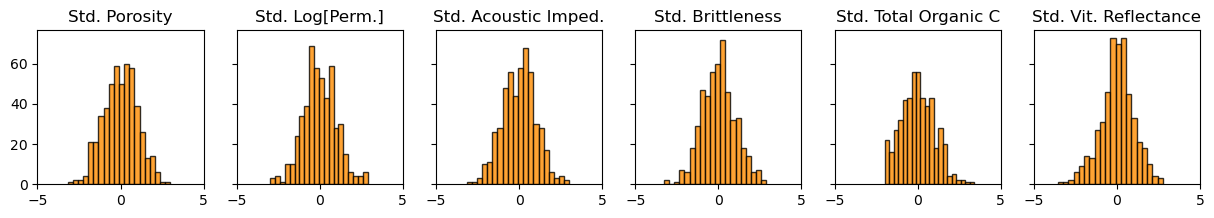

In [60]:
f, (ax6,ax7,ax8,ax9,ax10,ax11) = plt.subplots(1, 6, sharey=True, figsize=(15,2))
ax6.hist(x_f6[:,0], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20); ax6.set_title('Std. Porosity'); ax6.set_xlim(-5,5)
ax7.hist(x_f6[:,1], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20); ax7.set_title('Std. Log[Perm.]'); ax7.set_xlim(-5,5)
ax8.hist(x_f6[:,2], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20); ax8.set_title('Std. Acoustic Imped.'); ax8.set_xlim(-5,5)
ax9.hist(x_f6[:,3], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20); ax9.set_title('Std. Brittleness'); ax9.set_xlim(-5,5)
ax10.hist(x_f6[:,4], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20); ax10.set_title('Std. Total Organic C'); ax10.set_xlim(-5,5)
ax11.hist(x_f6[:,5], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20); ax11.set_title('Std. Vit. Reflectance'); ax11.set_xlim(-5,5)
plt.show()

The summary statistics and distributions look good.  No obvious missing data, gaps, significant truncations, spikes or outliers.  We are ready to perform principal component analysis on our 6 features.

In [62]:
n_components = 6
pca_f6 = PCA(n_components=n_components)
pca_f6.fit(x_f6)

print(np.round(pca_f6.components_,3))                     # visualize the component loadings

[[ 0.558  0.476 -0.405 -0.211  0.504  0.01 ]
 [-0.117 -0.114 -0.432 -0.323 -0.229 -0.794]
 [-0.019 -0.124  0.384 -0.898  0.07   0.157]
 [-0.214 -0.674 -0.424 -0.006  0.526  0.21 ]
 [-0.784  0.522 -0.031 -0.046  0.331 -0.019]
 [ 0.12  -0.138  0.566  0.206  0.55  -0.549]]


Let's look at the component loadings first.  Each row is a component, top row is the first principal component (PC1), next row is the second principal component (PC2) up to the last row the sixth principal component (PC6).  The columns are the features ordered from 'Por', 'LogPerm', 'AI', 'Brittle', 'TOC', to 'VR'.

First principal component is mainly composed of porosity, log permeability, acoustic impedance and total organic carbon, suggesting that the way they vary together is responsible for much of the variance.  The next principle component is mainly composed of vitrinite reflectance.  The third principal coordinate is mainly composed of brittleness and so on.

#### Scree Plots

To assist in this interpretation we should consider the variance contributions from each principal component.

Variance explained by PC1 thru PC6 = [0.462 0.246 0.149 0.11  0.024 0.009]


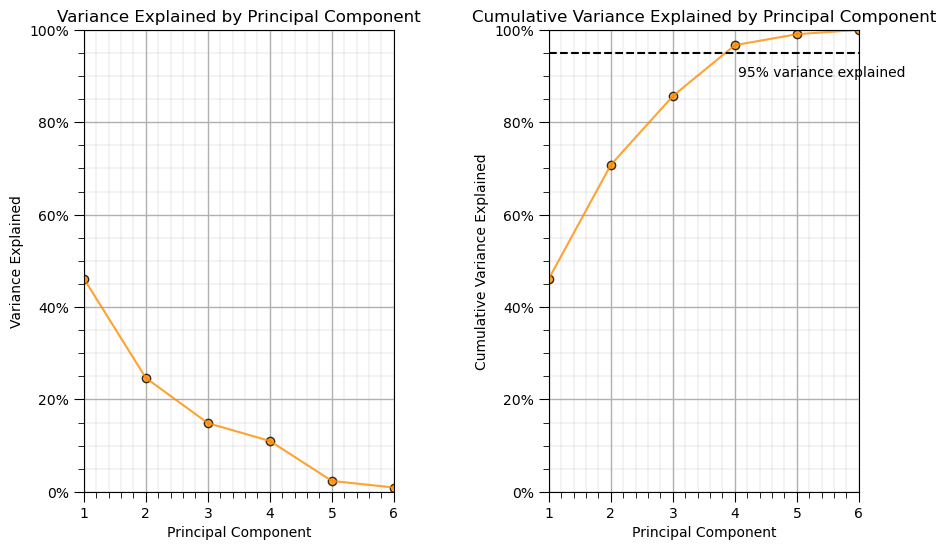

In [64]:
print('Variance explained by PC1 thru PC6 =', np.round(pca_f6.explained_variance_ratio_,3))

f, (ax10, ax11) = plt.subplots(1, 2,figsize=(10,6))
f.subplots_adjust(wspace=0.5,hspace = 0.3)

ax10.plot(np.arange(1,7,1),pca_f6.explained_variance_ratio_*100,color='darkorange',alpha=0.8)
ax10.scatter(np.arange(1,7,1),pca_f6.explained_variance_ratio_*100,color='darkorange',alpha=0.8,edgecolor='black')
ax10.set_xlabel('Principal Component'); ax10.set_ylabel('Variance Explained'); ax10.set_title('Variance Explained by Principal Component')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt); ax10.set_xlim(1,6); ax10.set_ylim(0,100.0)
ax10.yaxis.set_major_formatter(yticks); add_grid2(ax10)

ax11.plot(np.arange(1,7,1),np.cumsum(pca_f6.explained_variance_ratio_*100),color='darkorange',alpha=0.8)
ax11.scatter(np.arange(1,7,1),np.cumsum(pca_f6.explained_variance_ratio_*100),color='darkorange',alpha=0.8,edgecolor='black')
ax11.plot([1,6],[95,95], color='black',linestyle='dashed')
ax11.set_xlabel('Principal Component'); ax11.set_ylabel('Cumulative Variance Explained'); ax11.set_title('Cumulative Variance Explained by Principal Component')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt); ax11.set_xlim(1,6); ax11.set_ylim(0,100.0); ax11.annotate('95% variance explained',[4.05,90])
ax11.yaxis.set_major_formatter(yticks); add_grid2(ax11)

plt.show()

We can see that about 46% of the variance is described by the 1st principal component and then about 25% is described by the 2nd principal component etc.  

#### Independence of Principal Component Scores

Let's check the pairwise feature correlations before and after the projection.

In [66]:
print('\nCorrelation Matrix of the 6 original features components:')
print(np.round(np.corrcoef(x_f6, rowvar = False),2))

print('\nCorrelation Matrix of the 6 principle components\' scores:')
print(np.round(np.corrcoef(pca_f6.transform(x_f6), rowvar = False),2))


Correlation Matrix of the 6 original features components:
[[ 1.    0.79 -0.49 -0.25  0.71  0.12]
 [ 0.79  1.   -0.32 -0.13  0.48  0.04]
 [-0.49 -0.32  1.    0.14 -0.53  0.47]
 [-0.25 -0.13  0.14  1.   -0.24  0.24]
 [ 0.71  0.48 -0.53 -0.24  1.    0.35]
 [ 0.12  0.04  0.47  0.24  0.35  1.  ]]

Correlation Matrix of the 6 principle components' scores:
[[ 1. -0.  0.  0. -0. -0.]
 [-0.  1.  0. -0.  0. -0.]
 [ 0.  0.  1.  0. -0. -0.]
 [ 0. -0.  0.  1.  0. -0.]
 [-0.  0. -0.  0.  1. -0.]
 [-0. -0. -0. -0. -0.  1.]]


The new projected features (even without dimensionality reduction, $p=m$) all have pairwise correlations of 0.0! 

* all the projected features are linearly independent of each other

#### Reduced Dimensionality Impact on a 2 Feature Relationship

It would be interesting to look just at the porosity vs. log permeability bivariate relationship when we retain $1,\ldots,6$ principal components.  

* to do this we use matrix math to reverse with PCA and the standardization with various number of principal component and then plot the scatter plots of log permeability vs. porosity.

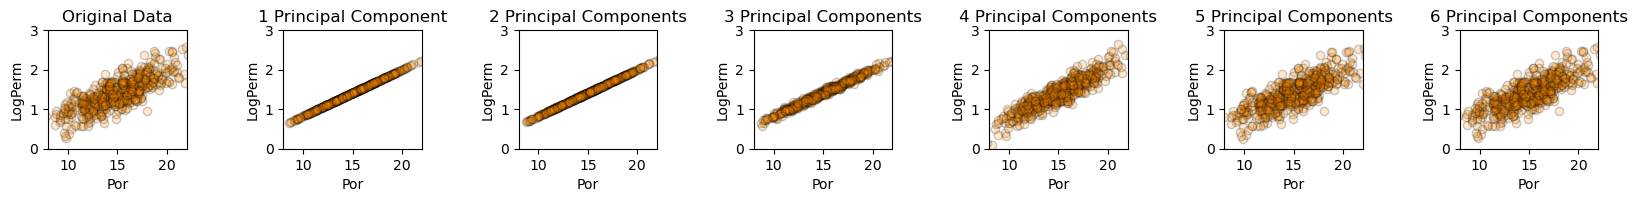

In [68]:
nComp = 6
xhat_6d = np.dot(pca_f6.transform(x_f6)[:,:nComp], pca_f6.components_[:nComp,:])
xhat_6d = sd_f6*xhat_6d + mu_f6

nComp = 5
xhat_5d = np.dot(pca_f6.transform(x_f6)[:,:nComp], pca_f6.components_[:nComp,:])
xhat_5d = sd_f6*xhat_5d + mu_f6

nComp = 4
xhat_4d = np.dot(pca_f6.transform(x_f6)[:,:nComp], pca_f6.components_[:nComp,:])
xhat_4d = sd_f6*xhat_4d + mu_f6

nComp = 3
xhat_3d = np.dot(pca_f6.transform(x_f6)[:,:nComp], pca_f6.components_[:nComp,:])
xhat_3d = sd_f6*xhat_3d + mu_f6

nComp = 2
xhat_2d = np.dot(pca_f6.transform(x_f6)[:,:nComp], pca_f6.components_[:nComp,:])
xhat_2d = sd_f6*xhat_2d + mu_f6

nComp = 1
xhat_1d = np.dot(pca_f6.transform(x_f6)[:,:nComp], pca_f6.components_[:nComp,:])
xhat_1d = sd_f6*xhat_1d + mu_f6

f, (ax12, ax13, ax14, ax15, ax16, ax17, ax18) = plt.subplots(1, 7,figsize=(20,20))
f.subplots_adjust(wspace=0.7)

ax12.scatter(my_data_f6["Por"],my_data_f6["LogPerm"],s=None, c="darkorange",marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
ax12.set_title('Original Data'); ax12.set_xlabel('Por'); ax12.set_ylabel('LogPerm')
ax12.set_ylim(0.0,3.0); ax12.set_xlim(8,22); ax12.set_aspect(4.0); 

ax13.scatter(xhat_1d[:,0],xhat_1d[:,1],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
ax13.set_title('1 Principal Component'); ax13.set_xlabel('Por'); ax13.set_ylabel('LogPerm')
ax13.set_ylim(0.0,3.0); ax13.set_xlim(8,22); ax13.set_aspect(4.0)

ax14.scatter(xhat_2d[:,0],xhat_2d[:,1],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
ax14.set_title('2 Principal Components'); ax14.set_xlabel('Por'); ax14.set_ylabel('LogPerm')
ax14.set_ylim(0.0,3.0); ax14.set_xlim(8,22); ax14.set_aspect(4.0)

ax15.scatter(xhat_3d[:,0],xhat_3d[:,1],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
ax15.set_title('3 Principal Components'); ax15.set_xlabel('Por'); ax15.set_ylabel('LogPerm')
ax15.set_ylim(0.0,3.0); ax15.set_xlim(8,22); ax15.set_aspect(4.0)

ax16.scatter(xhat_4d[:,0],xhat_4d[:,1],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
ax16.set_title('4 Principal Components'); ax16.set_xlabel('Por'); ax16.set_ylabel('LogPerm')
ax16.set_ylim(0.0,3.0); ax16.set_xlim(8,22); ax16.set_aspect(4.0)

ax17.scatter(xhat_5d[:,0],xhat_5d[:,1],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
ax17.set_title('5 Principal Components'); ax17.set_xlabel('Por'); ax17.set_ylabel('LogPerm')
ax17.set_ylim(0.0,3.0); ax17.set_xlim(8,22); ax17.set_aspect(4.0)

ax18.scatter(xhat_6d[:,0],xhat_6d[:,1],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
ax18.set_title('6 Principal Components'); ax18.set_xlabel('Por'); ax18.set_ylabel('LogPerm')
ax18.set_ylim(0.0,3.0); ax18.set_xlim(8,22); ax18.set_aspect(4.0)

plt.show()

Very interesting to watch the accuracy of the bivariate relationship between log permeability and porosity improve as we include more components.  Let's check the variances.  


In [70]:
print('1 Principal Component : Variance Por =',np.round(np.var(xhat_1d[:,0])/(sd_f6[0]*sd_f6[0]),2),' Variance Log Perm = ',np.round(np.var(xhat_1d[:,1])/(sd_f6[1]*sd_f6[1]),2))

print('2 Principal Components: Variance Por =',np.round(np.var(xhat_2d[:,0])/(sd_f6[0]*sd_f6[0]),2),' Variance Log Perm = ',np.round(np.var(xhat_2d[:,1])/(sd_f6[1]*sd_f6[1]),2))

print('3 Principal Components: Variance Por =',np.round(np.var(xhat_3d[:,0])/(sd_f6[0]*sd_f6[0]),2),' Variance Log Perm = ',np.round(np.var(xhat_3d[:,1])/(sd_f6[1]*sd_f6[1]),2))

print('4 Principal Components: Variance Por =',np.round(np.var(xhat_4d[:,0])/(sd_f6[0]*sd_f6[0]),2),' Variance Log Perm = ',np.round(np.var(xhat_4d[:,1])/(sd_f6[1]*sd_f6[1]),2))

print('5 Principal Components: Variance Por =',np.round(np.var(xhat_5d[:,0])/(sd_f6[0]*sd_f6[0]),2),'  Variance Log Perm = ',np.round(np.var(xhat_5d[:,1])/(sd_f6[1]*sd_f6[1]),2))

print('6 Principal Components: Variance Por =',np.round(np.var(xhat_6d[:,0])/(sd_f6[0]*sd_f6[0]),2),'  Variance Log Perm = ',np.round(np.var(xhat_6d[:,1])/(sd_f6[1]*sd_f6[1]),2))

1 Principal Component : Variance Por = 0.86  Variance Log Perm =  0.63
2 Principal Components: Variance Por = 0.88  Variance Log Perm =  0.65
3 Principal Components: Variance Por = 0.88  Variance Log Perm =  0.66
4 Principal Components: Variance Por = 0.91  Variance Log Perm =  0.96
5 Principal Components: Variance Por = 1.0   Variance Log Perm =  1.0
6 Principal Components: Variance Por = 1.0   Variance Log Perm =  1.0


This is interesting.  With the first principal component we describe 86% of the porosity variance. The next two principal components do not provide much assistance. Then there is a jump with the 4th and 5th principal components.  

* of course, the problem is 6 dimensional, not just porosity vs. log permeability, but is it interesting to see the relationship between number of principal components and variance retained each of these 2 original features  

* principal components do not uniformly described each feature

#### Reduced Dimensionality Impact on Matrix Scatter Plots of All Features

Let's look at the matrix scatter plots for see all of the bivariate combinations.

* first some book keeping, we have to put the 6D reduced dimensionality models in DataFrames (there are currently Numpy ndarrays.

In [72]:
df_1d = pd.DataFrame(data=xhat_1d,columns=features)   
df_2d = pd.DataFrame(data=xhat_2d,columns=features)
df_3d = pd.DataFrame(data=xhat_3d,columns=features)
df_4d = pd.DataFrame(data=xhat_4d,columns=features)
df_5d = pd.DataFrame(data=xhat_5d,columns=features)
df_6d = pd.DataFrame(data=xhat_6d,columns=features)

Now we can go ahead and produce the matrix scatter plots with these DataFrames. It is very interesting to see the accuracy of the bivariate plots improve as we add principal components.  Also, with only two principal components we capture some of the bivariate relationships quite well for some of the variable pairs.

<Figure size 640x480 with 0 Axes>

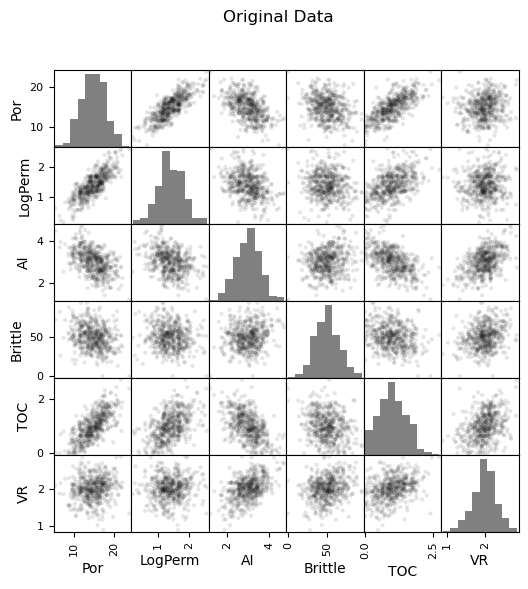

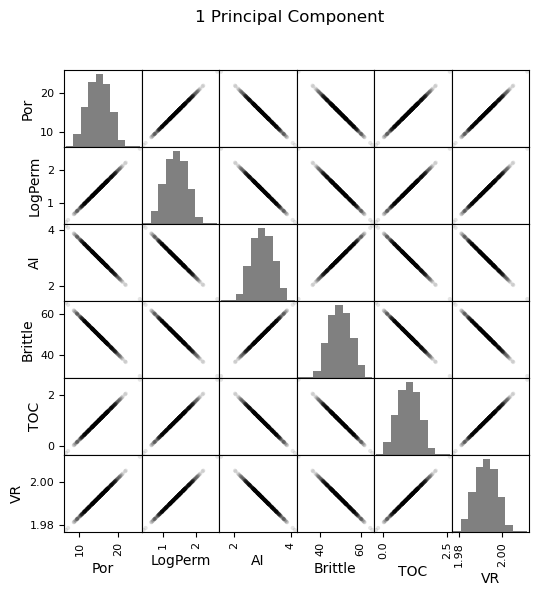

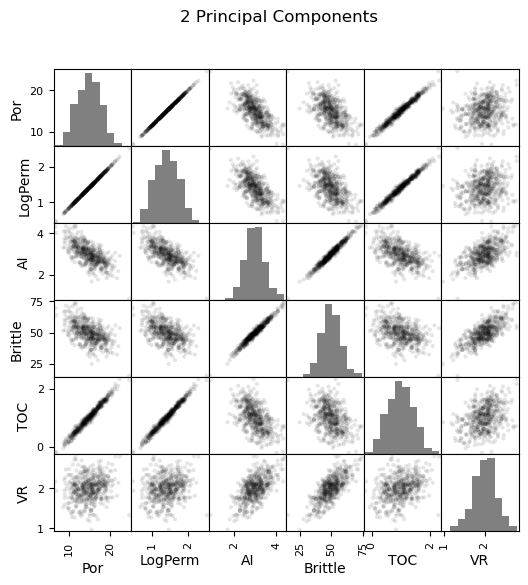

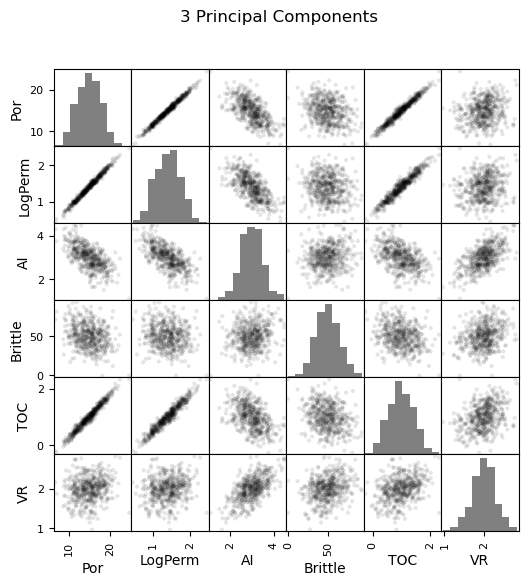

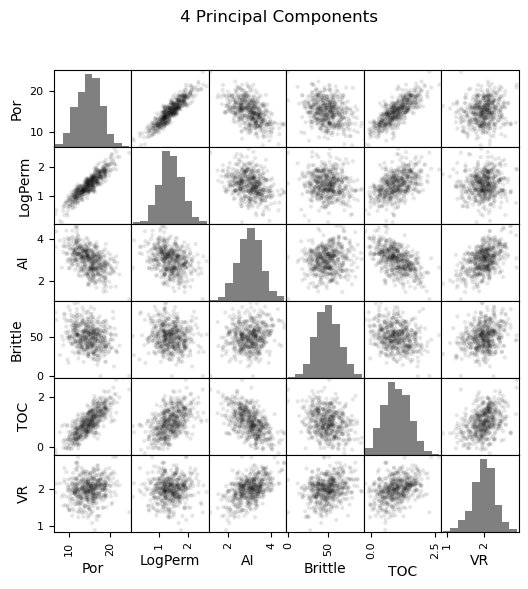

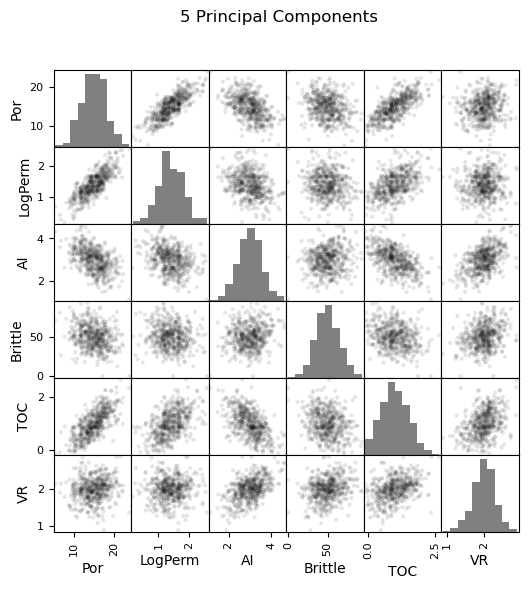

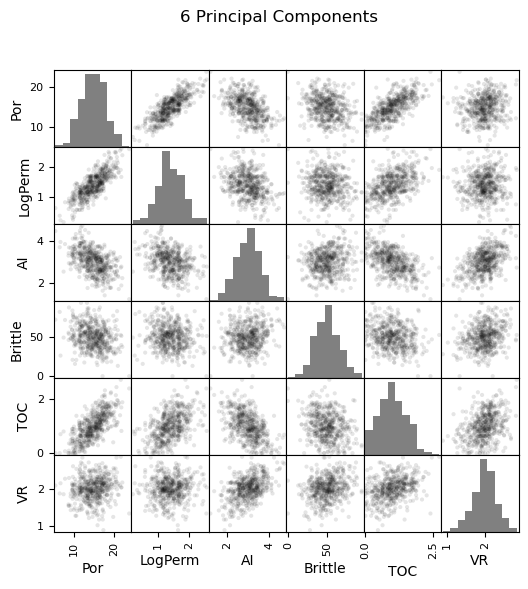

In [74]:
fig = plt.figure()

pd_plot.scatter_matrix(my_data_f6, alpha = 0.1,           # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('Original Data')

pd_plot.scatter_matrix(df_1d, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('1 Principal Component')

pd_plot.scatter_matrix(df_2d, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('2 Principal Components')

pd_plot.scatter_matrix(df_3d, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('3 Principal Components')

pd_plot.scatter_matrix(df_4d, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('4 Principal Components')

pd_plot.scatter_matrix(df_5d, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('5 Principal Components')

pd_plot.scatter_matrix(df_6d, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('6 Principal Components')

plt.show()

#### Principal Components Analysis on Uncorrelated Data

Let's try one more test, principal components analysis on uncorrelated data.  

* we generate a large number of random samples (n is large) for 5 feature.

* we will assume a uniform distribution

Variance of original features:  [0.08 0.08 0.08 0.08 0.08]
Proportion of variance of original features:  [0.2 0.2 0.2 0.2 0.2]
Correlation Matrix of original features:

[[ 0.08  0.    0.    0.    0.  ]
 [ 0.    0.08 -0.    0.   -0.  ]
 [ 0.   -0.    0.08  0.   -0.  ]
 [ 0.    0.    0.    0.08 -0.  ]
 [ 0.   -0.   -0.   -0.    0.08]]

PCA Variance Explained  [0.2 0.2 0.2 0.2 0.2]

Correlation Matrix of scores:

[[ 0.08 -0.   -0.   -0.   -0.  ]
 [-0.    0.08  0.   -0.   -0.  ]
 [-0.    0.    0.08 -0.   -0.  ]
 [-0.   -0.   -0.    0.08 -0.  ]
 [-0.   -0.   -0.   -0.    0.08]]



Text(0.5, 0.98, 'Principal Component Scores')

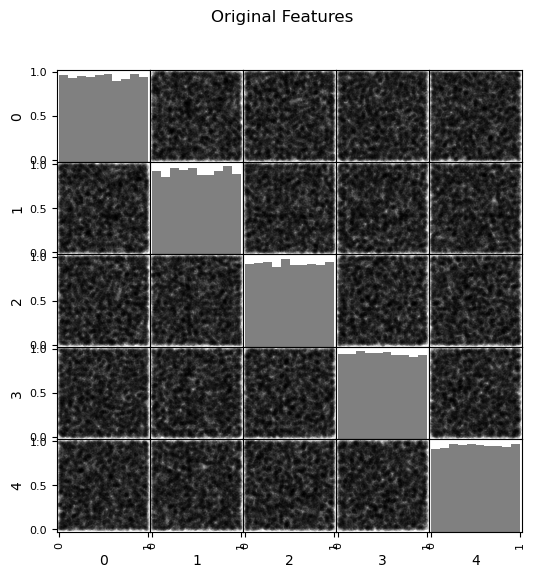

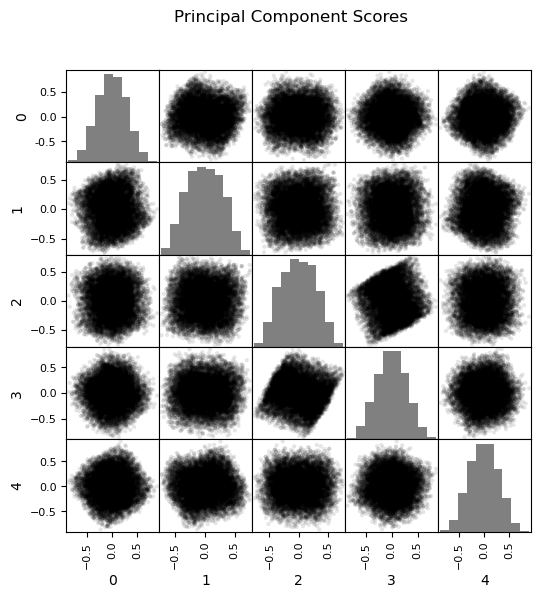

In [76]:
x_rand = np.random.rand(10000,5); df_x_rand = pd.DataFrame(x_rand)
print('Variance of original features: ', np.round(np.var(x_rand, axis = 0),2))
print('Proportion of variance of original features: ', np.round(np.var(x_rand, axis = 0)/np.sum(np.var(x_rand, axis = 0)),2))
print('Correlation Matrix of original features:\n'); print(np.round(np.cov(x_rand, rowvar = False),2)); print()

pd_plot.scatter_matrix(df_x_rand, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('Original Features')

pca_rand = PCA(n_components=5)
pca_rand.fit(x_rand)
print('PCA Variance Explained ', np.round(pca_rand.explained_variance_ratio_,2))  

scores_x_rand = pca_rand.transform(x_rand); df_scores_x_rand = pd.DataFrame(scores_x_rand)

print('\nCorrelation Matrix of scores:\n'); print(np.round(np.cov(scores_x_rand, rowvar = False),2)); print()

pd_plot.scatter_matrix(df_scores_x_rand, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('Principal Component Scores')

What happens when principal component analysis is applied to uncorrelated, uniformly distributed features?

* all the principal components describe the same amount of variance
* there is no opportunity for dimensionality reduction through feature projection
* the linear combination of independent random variables invokes the central limit theorem, the principle component scores tend to a Gaussian distribution (see the rounding of the points in the matrix scatter plots above)

#### Practice on a New Dataset

Ok, time to get to work. Let's load up a dataset and perform PCA with,

* compact code

* basic visaulizations

* save the output

You can select any of these datasets or modify the code and add your own to do this.

##### Dataset 0, Unconventional Multivariate v4

Let's load the provided multivariate, dataset [unconv_MV.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/unconv_MV_v4.csv). This dataset has variables from 1,000 unconventional wells including:

* well average porosity
* log transform of permeability (to linearize the relationships with other variables)
* acoustic impedance (kg/m^3 x m/s x 10^6)
* brittleness ratio (%)
* total organic carbon (%)
* vitrinite reflectance (%)
* initial production 90 day average (MCFPD).

##### Dataset 1, Twelve, 12

Let's load the provided multivariate, 2D spatial dataset [12_sample_data.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/12_sample_data.csv). This dataset has variables from 480 unconventional wells including:

* X (m), Y (m) location coordinates
* facies (0 - shale, 1 - sand)
* porosity (%) after units conversion
* permeability (mD)
* acoustic impedance (kg/m^3 x m/s x 10^6)

##### Dataset 2, Reservoir 21

Let's load the provided multivariate, 3D spatial dataset [res21_wells.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/res21_wells.csv). This dataset has variables from 73 vertical wells over a 10,000m x 10,000m x 50 m reservoir unit:

* well (ID)
* X (m), Y (m), Depth (m) location coordinates
* Porosity (%) after units conversion
* Permeability (mD)
* Acoustic Impedance (kg/m2s*10^6) after units conversion
* Facies (categorical) - ordinal with ordering from Shale, Sandy Shale, Shaley Sand, to Sandstone.
* Density (g/cm^3)
* Compressible velocity (m/s)
* Youngs modulus (GPa)
* Shear velocity (m/s)
* Shear modulus (GPa)

We load the tabular data with the pandas 'read_csv' function into a DataFrame we called 'my_data' and then preview it to make sure it loaded correctly.

* we also populate lists with data ranges and labels for ease of plotting

Load and format the data,

* drop the response feature
* reformate the features as needed
* also, I like to store the metadata in lists

In [284]:
idata = 0                                                     # select the dataset

if idata == 0:
    df_new = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv') # load data from Dr. Pyrcz's GitHub repository  
    df_new.drop(['Well','Prod'],axis=1,inplace=True)          # remove well index and response feature

    features = df_new.columns.values.tolist()                 # store the names of the features
    
    xmin_new = [6.0,0.0,1.0,10.0,0.0,0.9]; xmax_new = [24.0,10.0,5.0,85.0,2.2,2.9] # set the minimum and maximum values for plotting

    flabel_new = ['Porosity (%)','Permeability (mD)','Acoustic Impedance (kg/m2s*10^6)','Brittleness Ratio (%)', # set the names for plotting
             'Total Organic Carbon (%)','Vitrinite Reflectance (%)']

    ftitle_new = ['Porosity','Permeability','Acoustic Impedance','Brittleness Ratio', # set the units for plotting
             'Total Organic Carbon','Vitrinite Reflectance']

elif idata == 1:
    names = {'Porosity':'Por'}
    
    df_new = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/12_sample_data.csv') # load data from Dr. Pyrcz's GitHub repository  
    df_new.drop(['X','Y','Unnamed: 0'],axis=1,inplace=True)   # remove response feature
    df_new = df_new.rename(columns=names)

    features = df_new.columns.values.tolist()                 # store the names of the features

    xmin_new = [0.0,0.0,0.0,4.0,0.0,6.5,1.4,1600.0,10.0,1300.0,1.6]; xmax_new = [10000.0,10000.0,1.0,19.0,500.0,8.3,3.6,6200.0,50.0,2000.0,12.0] # set the minimum and maximum values for plotting
    
    flabel_new = ['Well (ID)','X (m)','Y (m)','Depth (m)','Porosity (fraction)','Permeability (mD)','Acoustic Impedance (kg/m2s*10^6)','Facies (categorical)',
              'Density (g/cm^3)','Compressible velocity (m/s)','Youngs modulus (GPa)', 'Shear velocity (m/s)', 'Shear modulus (GPa)'] # set the names for plotting

    ftitle_new = ['Well','X','Y','Depth','Porosity','Permeability','Acoustic Impedance','Facies',
              'Density','Compressible velocity','Youngs modulus', 'Shear velocity', 'Shear modulus']

elif idata == 2:  
    df_new = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/res21_2D_wells.csv') # load data from Dr. Pyrcz's GitHub repository  
    df_new.drop(['Well_ID','X','Y','CumulativeOil'],axis=1,inplace=True) # remove Well Index, X and Y coordinates, and response feature
    df_new = df_new.dropna(how='any',inplace=False)
     
    features = df_new.columns.values.tolist()                 # store the names of the features

    xmin_new = [1,0.0,0.0,4.0,0.0,6.5,1.4,1600.0,10.0,1300.0,1.6]; xmax_new = [73,10000.0,10000.0,19.0,500.0,8.3,3.6,6200.0,50.0,2000.0,12.0] # set the minimum and maximum values for plotting
    
    flabel_new = ['Well (ID)','X (m)','Y (m)','Depth (m)','Porosity (fraction)','Permeability (mD)','Acoustic Impedance (kg/m2s*10^6)','Facies (categorical)',
              'Density (g/cm^3)','Compressible velocity (m/s)','Youngs modulus (GPa)', 'Shear velocity (m/s)', 'Shear modulus (GPa)'] # set the names for plotting

    ftitle_new = ['Well','X','Y','Depth','Porosity','Permeability','Acoustic Impedance','Facies',
              'Density','Compressible velocity','Youngs modulus', 'Shear velocity', 'Shear modulus']

df_new[df_new.columns] = MinMaxScaler().fit_transform(df_new) # min/max normalize all the features
df_new.head(n=13)

,Por,Perm,AI,Brittle,TOC,VR
0,0.325294,0.204805,0.453731,0.960076,0.569620,0.711340
1,0.342941,0.274600,0.579104,0.480038,0.455696,0.489691
2,0.439412,0.167048,0.814925,0.842894,0.455696,0.922680
3,0.654118,0.643021,0.402985,0.393378,0.535865,0.489691
4,0.645294,0.393593,0.567164,0.000000,0.717300,0.500000
5,0.469412,0.421053,0.420896,0.581278,0.476793,0.381443
6,0.408235,0.282609,0.492537,0.719035,0.417722,0.474227
7,0.295882,0.217391,0.588060,0.573103,0.371308,0.515464
8,0.351176,0.181922,0.343284,0.747105,0.481013,0.541237
9,0.394118,0.321510,0.725373,0.752964,0.561181,0.886598


##### Perform Principal Components Analysis

Perform principal components analysis,

1. Calculate the principal component loadings

2. Select the number of principal components to describe a target variance explained

3. Make a new DataFrame with the principal component scores

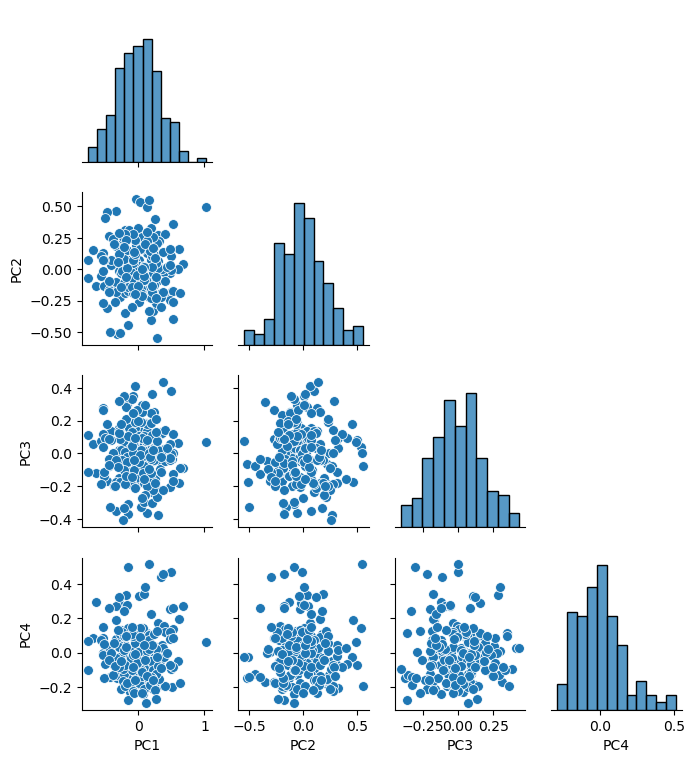

In [287]:
var_explained = 0.95                                          # select the minimum variance explained

n_components = min(len(df_new.columns),len(df_new)-1)         # max components is min of number of features or number of data - 1
pca_new = PCA(n_components=n_components).fit(df_new.values)   # calculate PCA
pca_scores = pca_new.fit_transform(df_new.values)

cumulative_variance = np.cumsum(pca_new.explained_variance_ratio_) # calculate cumulative explained variance

n_selected = np.argmax(cumulative_variance >= var_explained) + 1 # find number of components to retain 95% variance

df_new_projected = pd.DataFrame(pca_scores[:, :n_selected],columns=[f'PC{i+1}' for i in range(n_selected)],
            index=df_new.index)                               # project data to that many principal components

sns.pairplot(df_new_projected.iloc[:,:], plot_kws={'alpha':1.0,'s':50}, palette = 'colorblind', corner=True) # matrix scatter plot
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.6, top=0.7, wspace=0.2, hspace=0.2); plt.show()

##### Check the Cumulative Variance Explained

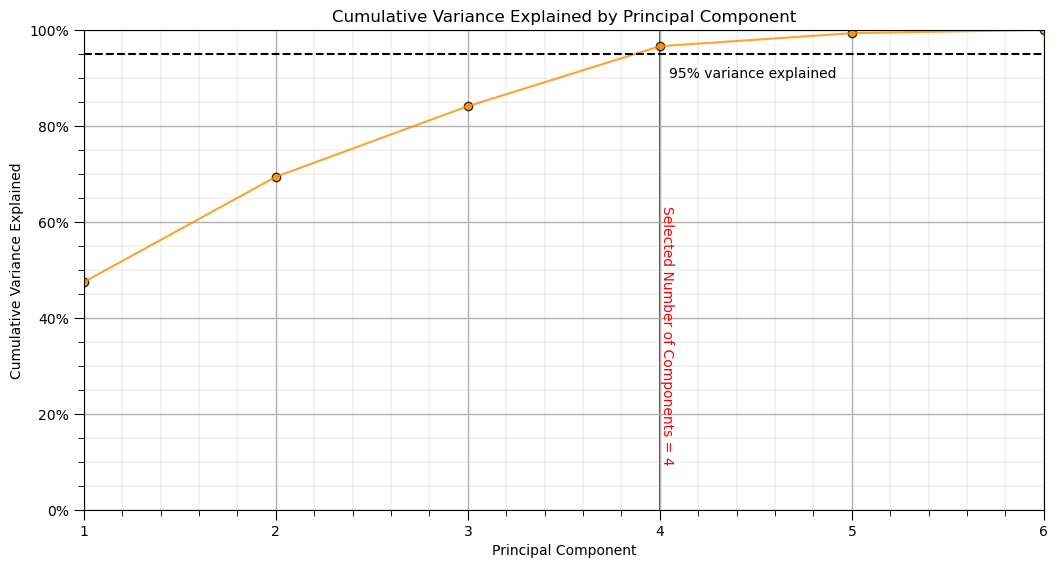

In [289]:
plt.plot(np.arange(1,len(pca_new.explained_variance_ratio_)+1,1),np.cumsum(pca_new.explained_variance_ratio_*100),color='darkorange',alpha=0.8)
plt.scatter(np.arange(1,len(pca_new.explained_variance_ratio_)+1,1),np.cumsum(pca_new.explained_variance_ratio_*100),color='darkorange',alpha=0.8,edgecolor='black')
plt.plot([1,len(df_new.columns)],[95,95], color='black',linestyle='dashed'); plt.plot([n_selected,n_selected],[0,100],color='red',zorder=-1)
plt.annotate('Selected Number of Components = '+ str(n_selected),[n_selected,10],rotation=270,color='red')
plt.xlabel('Principal Component'); plt.ylabel('Cumulative Variance Explained'); plt.title('Cumulative Variance Explained by Principal Component')
fmt = '%.0f%%' # Format you want the ticks
plt.xticks(range(1, len(cumulative_variance) + 1))
yticks = mtick.FormatStrFormatter(fmt); plt.xlim(1,len(pca_new.explained_variance_ratio_)); plt.ylim(0,100.0) 
plt.annotate('95% variance explained',[4.05,90]); add_grid()
plt.gca().yaxis.set_major_formatter(PercentFormatter(100.0))  # 1.0 = 100%
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.0, wspace=0.2, hspace=0.2); plt.show()

##### Save the Principal Components

Now we can choose to write out the DataFrame with the reduced dimensionality principal component scores.

In [293]:
save_PCA = True                                        # save the imputed DataFrame?
 
if save_PCA == True:
    folder = r'C:\Local'
    file_name = r'dataframe_PCA.csv'

    df_new_projected.to_csv(folder + "/" + file_name, index=False)



#### Comments

This was a basic treatment of dimensionality reduction by principal component analysis (PCA). Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).
#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)